<h1 style="font-size:32px; text-align:center;">Projet Scoring</h1>
<hr>
<h1 style="font-size:18px; text-align:center; margin-bottom:24px;">Ousmane KA</h1>
<hr>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno
from skimpy import skim
import warnings
import os
import itertools
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency, mannwhitneyu
warnings.filterwarnings('ignore')

In [27]:
hmeq = pd.read_csv('./Dataset/hmeq.csv')

## <span style="color:#0a8791; font-size:24px;"><b><u> Traitement des données</u></b></span>

<span style="color:darkred; font-size:20px;"><b><u>Les Valeurs Manquantes</u></b></span>

In [28]:
num_cols = ["MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO", "DEBTINC"]
cat_cols = ["JOB", "REASON"]

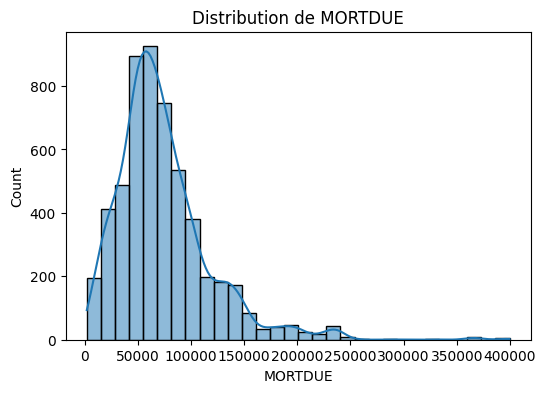

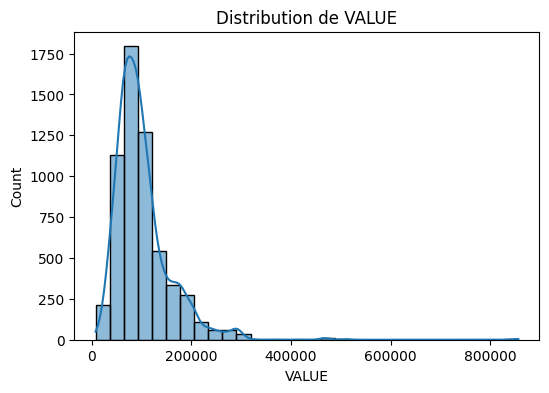

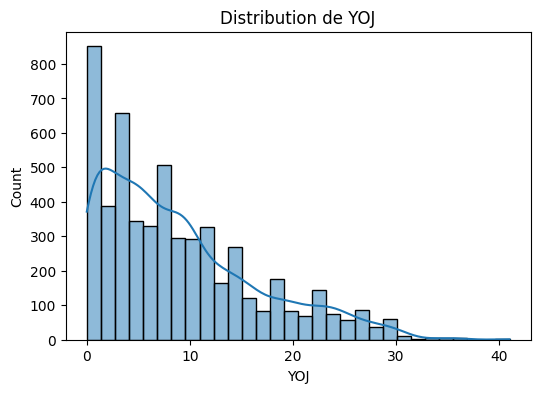

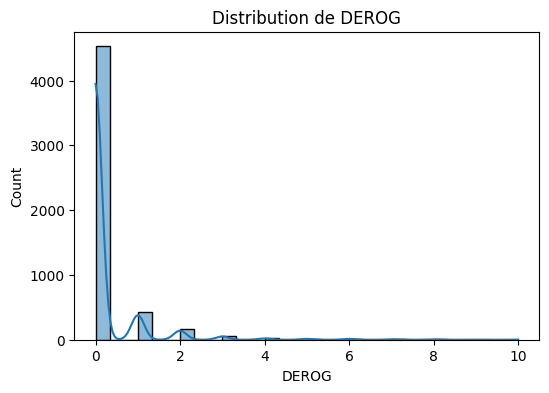

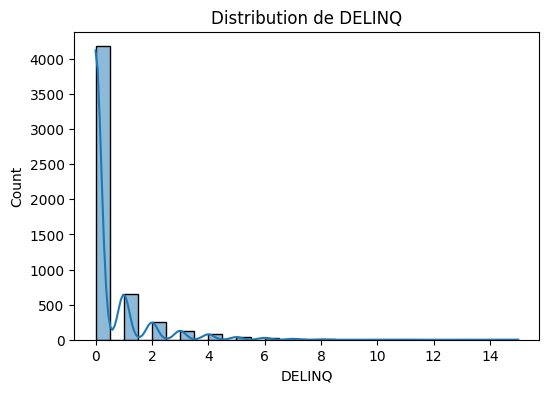

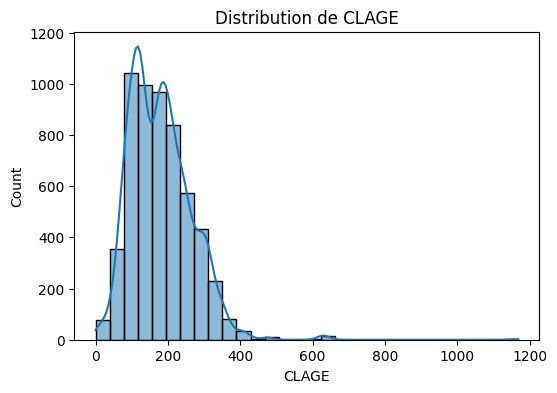

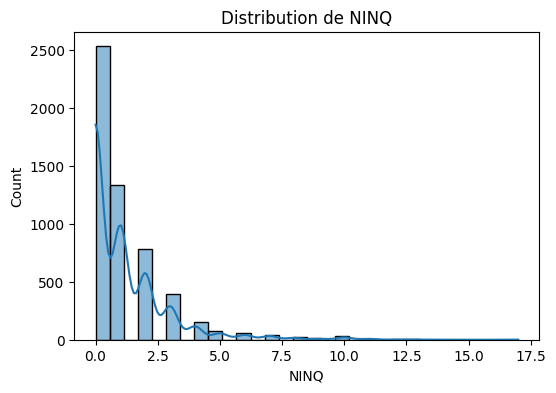

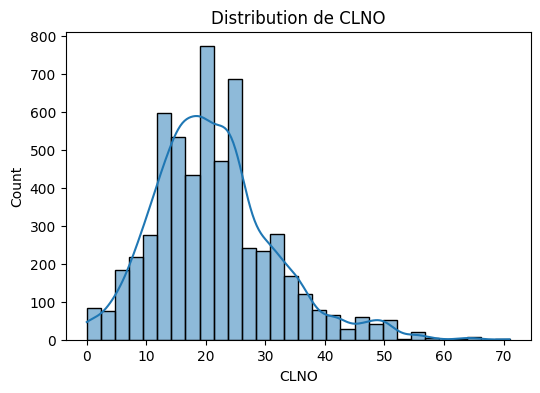

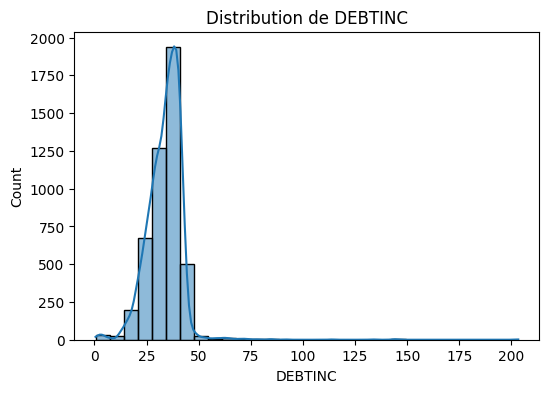

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer les histogrammes
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(hmeq[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution de {col}')
    plt.show()


In [30]:
from scipy.stats import skew, kurtosis

for col in num_cols:
    print(f"{col}:")
    print(f"  Skewness (Asymétrie)  : {hmeq[col].skew():.2f}")
    print(f"  Kurtosis (Aplatissement) : {hmeq[col].kurt():.2f}")
    print("-" * 40)


MORTDUE:
  Skewness (Asymétrie)  : 1.81
  Kurtosis (Aplatissement) : 6.48
----------------------------------------
VALUE:
  Skewness (Asymétrie)  : 3.05
  Kurtosis (Aplatissement) : 24.36
----------------------------------------
YOJ:
  Skewness (Asymétrie)  : 0.99
  Kurtosis (Aplatissement) : 0.37
----------------------------------------
DEROG:
  Skewness (Asymétrie)  : 5.32
  Kurtosis (Aplatissement) : 36.87
----------------------------------------
DELINQ:
  Skewness (Asymétrie)  : 4.02
  Kurtosis (Aplatissement) : 23.57
----------------------------------------
CLAGE:
  Skewness (Asymétrie)  : 1.34
  Kurtosis (Aplatissement) : 7.60
----------------------------------------
NINQ:
  Skewness (Asymétrie)  : 2.62
  Kurtosis (Aplatissement) : 9.79
----------------------------------------
CLNO:
  Skewness (Asymétrie)  : 0.78
  Kurtosis (Aplatissement) : 1.16
----------------------------------------
DEBTINC:
  Skewness (Asymétrie)  : 2.85
  Kurtosis (Aplatissement) : 50.50
-------------------

In [31]:
# Calculer l'asymétrie (skewness) pour les colonnes numériques
skewness = hmeq[num_cols].skew()

# Classifier la méthode d'imputation en fonction des valeurs d'asymétrie
imputation_methods = {}
for col in num_cols:
    if abs(skewness[col]) < 1:  # Distribution symétrique
        imputation_methods[col] = "Moyenne"  # Utiliser la moyenne pour l'imputation
    else:  # Distribution asymétrique (skewed)
        imputation_methods[col] = "Médiane"  # Utiliser la médiane pour l'imputation

skewness, imputation_methods


(MORTDUE    1.814481
 VALUE      3.053344
 YOJ        0.988460
 DEROG      5.320870
 DELINQ     4.023150
 CLAGE      1.343412
 NINQ       2.621984
 CLNO       0.775052
 DEBTINC    2.852353
 dtype: float64,
 {'MORTDUE': 'Médiane',
  'VALUE': 'Médiane',
  'YOJ': 'Moyenne',
  'DEROG': 'Médiane',
  'DELINQ': 'Médiane',
  'CLAGE': 'Médiane',
  'NINQ': 'Médiane',
  'CLNO': 'Moyenne',
  'DEBTINC': 'Médiane'})

In [32]:
job_missing_percentage = hmeq["JOB"].isnull().sum() / len(hmeq) * 100
job_missing_percentage

4.681208053691275

Les valeurs manquantes sont peu nombreuses (< 5-10 %) :
Utilisons l'imputation par le mode. C'est la méthode la plus simple et la plus couramment utilisée pour les variables catégorielles.

In [33]:
most_frequent_job = hmeq['JOB'].mode()[0]
hmeq['JOB'].fillna(most_frequent_job, inplace=True)

In [34]:
reason_missing_percentage = hmeq["REASON"].isnull().sum() / len(hmeq) * 100
reason_missing_percentage

4.228187919463087

In [35]:
most_frequent_reason = hmeq['REASON'].mode()[0]
hmeq['REASON'].fillna(most_frequent_reason, inplace=True)

In [36]:
# Pourcentage de valeurs manquantes pour chaque colonne numérique
missing_percentage = hmeq[num_cols].isna().mean() * 100
print(missing_percentage)

MORTDUE     8.691275
VALUE       1.879195
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


La médiane est robuste aux valeurs aberrantes (outliers) et préserve la distribution des données. Elle est particulièrement utile pour les variables asymétriques ou avec des valeurs extrêmes.

Pour les variables comme MORTDUE, VALUE, YOJ, CLAGE, et DEBTINC, qui peuvent avoir des distributions asymétriques ou des valeurs aberrantes.

In [37]:
num_cols_med = ["MORTDUE", "VALUE", "CLAGE", "NINQ", "DEBTINC"]

In [38]:
# Imputation par la médiane
for col in num_cols:
    median_value = hmeq[col].median()
    hmeq[col].fillna(median_value, inplace=True)

Pour certaines variables comme DEROG (nombre de rapports dérogatoires) ou DELINQ (nombre de lignes de crédit délinquantes), une valeur manquante peut signifier l'absence de l'événement (c'est-à-dire zéro).

In [39]:
# Imputation par zéro pour DEROG et DELINQ
hmeq['DEROG'].fillna(0, inplace=True)
hmeq['DELINQ'].fillna(0, inplace=True)

La moyenne est une méthode simple et couramment utilisée pour les variables symétriques sans valeurs aberrantes.

Pour les variables comme NINQ ou CLNO, qui ont des distributions relativement symétriques.

In [40]:
num_cols_moy = ["YOJ", "CLNO"]

In [41]:
# Imputation par la moyenne
for col in num_cols_moy:
    mean_value = hmeq[col].mean()
    hmeq[col].fillna(mean_value, inplace=True)

In [42]:
hmeq.shape

(5960, 13)

In [43]:
# Vérifier la structure des données après gestion des valeurs manquantes 
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [44]:
# verifier les valeurs nan
hmeq.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

<span style="color:darkred; font-size:20px;"><b><u>Les Variables Catégoriques (Encodage)</u></b></span>

Cette étapes peut affecter par la suite la création des modèles prédictifs donc pour chaque modèle on choissira l'encodage approprié.
Le random forest ou l'arbre décisionnel privilégie qu'on garde toutes les valeurs catégoriques des colonnes catériques (one hot encoding sans without drop_first). Alors les modèles comme la régression logistique est optimale avec.

<span style="color:darkred; font-size:20px;"><b><u>Les Outliers (Valeurs Extrême et/ou Aberrantes)</u></b></span>

In [45]:
# Identifier les colonnes numériques (en excluant les variables catégorielles et la variable cible)
num_cols = hmeq.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("BAD")  # Exclure la variable cible

# Compter le nombre de valeurs uniques dans chaque colonne numérique
count_num_cols = {}
for col in num_cols:
    count = hmeq[col].value_counts().shape[0]  # Compter le nombre de valeurs uniques dans la colonne
    count_num_cols[col] = count

count_num_cols


{'LOAN': 540,
 'MORTDUE': 5054,
 'VALUE': 5382,
 'YOJ': 99,
 'DEROG': 11,
 'DELINQ': 14,
 'CLAGE': 5314,
 'NINQ': 16,
 'CLNO': 62,
 'DEBTINC': 4693}

In [46]:
# Identifier les colonnes numériques (en excluant les variables catégorielles et la variable cible)
num_cols = hmeq.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("BAD")  # Exclure la variable cible

# Calculer l'IQR pour chaque colonne numérique
outliers = {}
for col in num_cols:
    Q1 = hmeq[col].quantile(0.25)  # Premier quartile
    Q3 = hmeq[col].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Plage interquartile
    lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
    upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
    
    # Identifier les valeurs aberrantes
    outlier_count = ((hmeq[col] < lower_bound) | (hmeq[col] > upper_bound)).sum()  # Nombre d'anomalies
    outliers[col] = outlier_count

# Trier et afficher les comptes des valeurs aberrantes
sorted_outliers = dict(sorted(outliers.items(), key=lambda item: item[1], reverse=True))
sorted_outliers


{'DELINQ': 1201,
 'DEROG': 725,
 'VALUE': 347,
 'MORTDUE': 308,
 'LOAN': 256,
 'DEBTINC': 247,
 'CLNO': 219,
 'YOJ': 211,
 'NINQ': 177,
 'CLAGE': 66}

In [47]:
# Détection par les Box-plot
var_num = ['LOAN',"MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO", "DEBTINC"]

for var in var_num:
    fig = px.box(
        hmeq,
        x=var,
        color="BAD",
        labels={var: "Valeurs", "BAD": "Statut"},
        title=f"Boxplot de la colonne {var} en fonction de BAD"
    )
    fig.update_layout(
        xaxis_title=var,
        yaxis_title="Statut (BAD)"
    )
    fig.show()


On va essayer de gérer ces outliers sans perdre trop d'information.

In [48]:
# initialement
hmeq.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73001.041812,101540.387423,8.756166,0.224329,0.405705,179.440725,1.170134,21.247819,34.000651
std,0.399656,11207.480417,42552.726779,56869.436682,7.259424,0.798458,1.079256,83.574697,1.653866,9.951308,7.644528
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [49]:
# Détection des outliers basés sur le Z-score
def detect_outliers_zscore(df, threshold=3):
    z_scores = np.abs(zscore(df.select_dtypes(include=['float64', 'int64'])))
    outlier_rows = (z_scores > threshold).any(axis=1)
    outliers_df = df[outlier_rows]
    return outliers_df, z_scores

outliers_df, z_scores = detect_outliers_zscore(hmeq)

# Affichage des outliers détectés
print("Outliers détectés avec le Z-score:")
print(outliers_df)

# Affichage des indices des outliers et du Z-score
outlier_indices = np.where(z_scores > 3)
print("\nIndices des outliers avec Z-score > 3:")
print(outlier_indices)

# Vérification des modifications
print("\nRésumé des données après traitement:")
print(hmeq.describe())

Outliers détectés avec le Z-score:
      BAD   LOAN  MORTDUE     VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
6       1   1800  48649.0   57037.0  HomeImp  Other   5.0    3.0     2.0   
16      1   2200  90957.0  102600.0  HomeImp    Mgr   7.0    2.0     6.0   
17      1   2200  23030.0   89235.5  DebtCon  Other  19.0    0.0     0.0   
31      1   2800  50795.0   63100.0  HomeImp   Self  26.0    2.0    15.0   
32      1   2800   4000.0   60850.0  HomeImp  Other  16.0    4.0     0.0   
...   ...    ...      ...       ...      ...    ...   ...    ...     ...   
5955    0  88900  57264.0   90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0   92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0   92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0   91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0   88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
6      77.

Résultats du test de normalité (Shapiro-Wilk) :
BAD: p-value = 6.596863240045138e-85
BAD ne suit pas une distribution normale.
LOAN: p-value = 1.6967363662941613e-59
LOAN ne suit pas une distribution normale.
MORTDUE: p-value = 1.4639126260763545e-57
MORTDUE ne suit pas une distribution normale.
VALUE: p-value = 1.6436235309487995e-64
VALUE ne suit pas une distribution normale.
YOJ: p-value = 5.187370030841634e-52
YOJ ne suit pas une distribution normale.
DEROG: p-value = 9.092106896336065e-92
DEROG ne suit pas une distribution normale.
DELINQ: p-value = 2.5523065944869244e-87
DELINQ ne suit pas une distribution normale.
CLAGE: p-value = 2.2897677735914702e-45
CLAGE ne suit pas une distribution normale.
NINQ: p-value = 2.3869730536076103e-74
NINQ ne suit pas une distribution normale.
CLNO: p-value = 3.057142163099754e-36
CLNO ne suit pas une distribution normale.
DEBTINC: p-value = 1.2670811453755631e-65
DEBTINC ne suit pas une distribution normale.


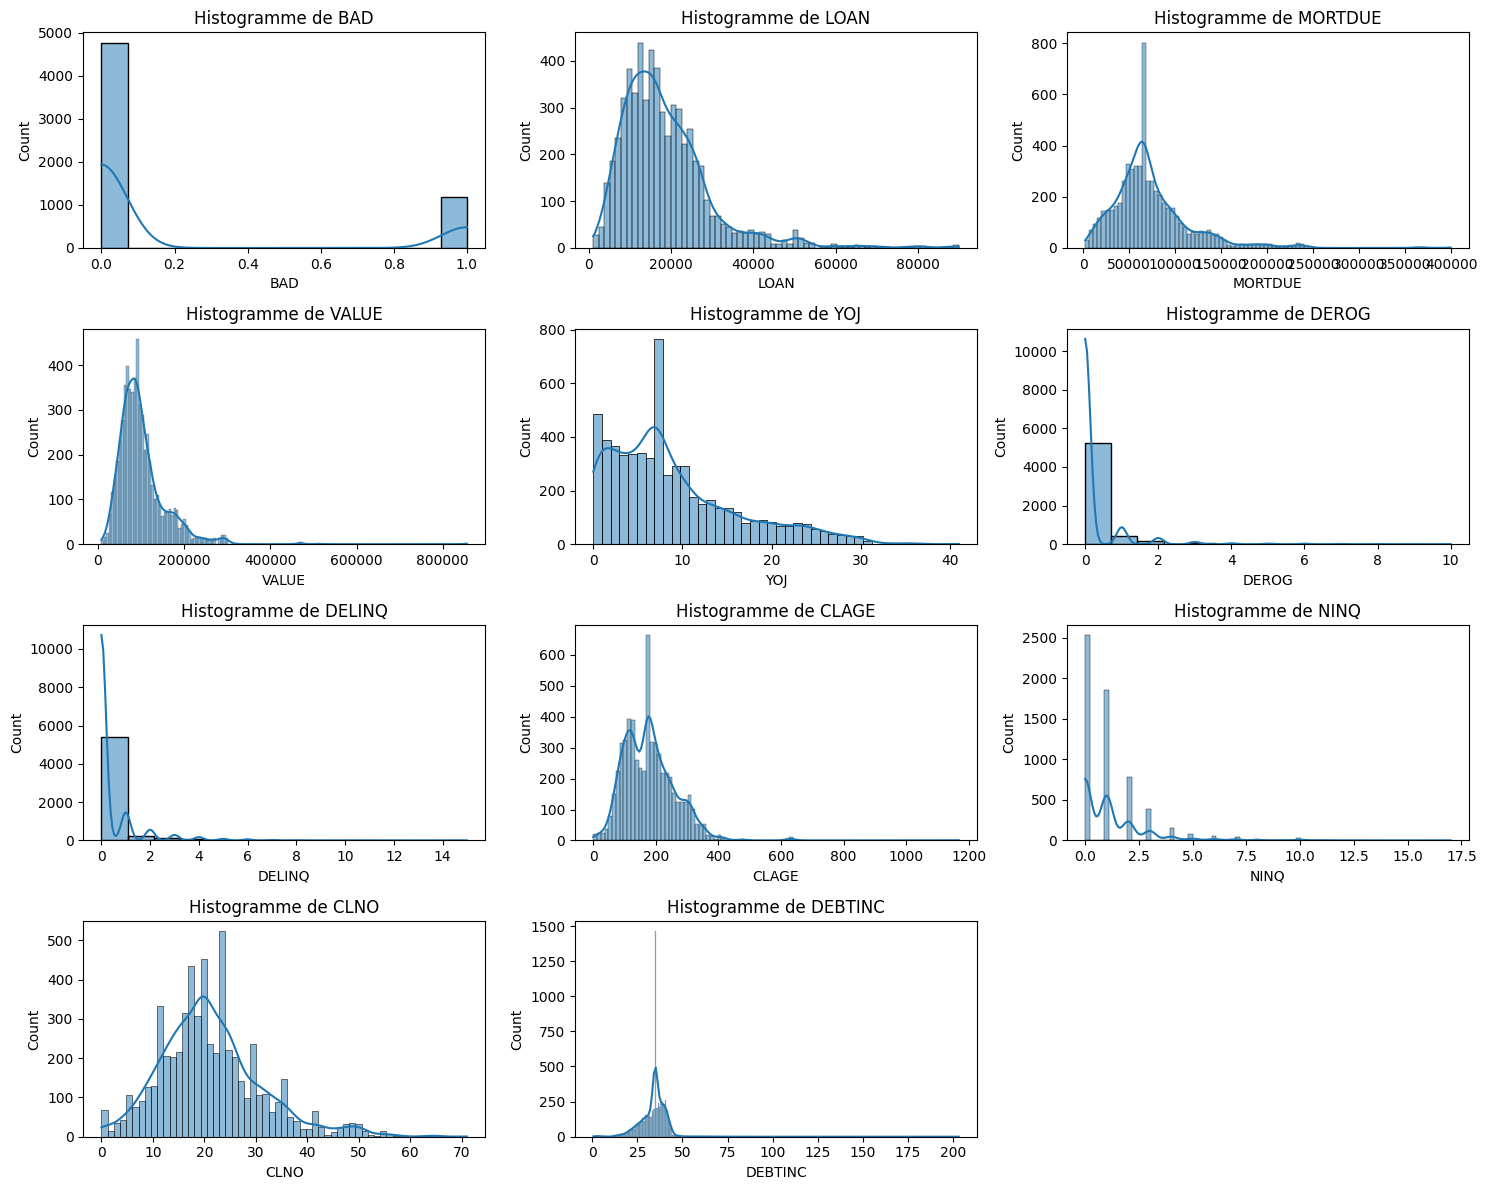

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Sélectionner les colonnes numériques
numeric_columns = hmeq.select_dtypes(include=[np.number]).columns

# Appliquer un test de Shapiro-Wilk pour chaque colonne numérique
normality_tests = {col: shapiro(hmeq[col].dropna())[1] for col in numeric_columns}

# Afficher les résultats du test de normalité
print("Résultats du test de normalité (Shapiro-Wilk) :")
for col, p_value in normality_tests.items():
    print(f"{col}: p-value = {p_value}")
    if p_value > 0.05:
        print(f"{col} suit une distribution normale.")
    else:
        print(f"{col} ne suit pas une distribution normale.")

# Calculer le nombre de lignes et colonnes pour la grille de subplots
num_cols = len(numeric_columns)
num_rows = int(np.ceil(num_cols / 3))  # Ajuster dynamiquement le nombre de lignes

plt.figure(figsize=(15, num_rows * 3))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)  # Ajustement dynamique
    sns.histplot(hmeq[col].dropna(), kde=True)
    plt.title(f"Histogramme de {col}")

plt.tight_layout()
plt.show()


Vu que la majorité des distributions ne sont pas normales alors on utilisera pas le zscore pour le traitement des outliers.

On va essayer de gérer ces outliers sans perdre trop d'information.


In [51]:

global_outliers_dict = {}
def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_outliers = len(outliers)

    global_outliers_dict[column] = num_outliers

for var in var_num:
    detect_outliers_iqr(hmeq, var)

df_outliers_values = pd.DataFrame.from_dict(global_outliers_dict, orient='index', columns=['Outliers'])


print(df_outliers_values)
px.bar(df_outliers_values,
       labels = {'value':"Nombre d'Outliers",'index':'Variables'},
       title = "Nombre d'Outliers dans chaque colonnes numériques avec la méthode de l'IQR")


         Outliers
LOAN          256
MORTDUE       308
VALUE         347
YOJ           211
DEROG         725
DELINQ       1201
CLAGE          66
NINQ          177
CLNO          219
DEBTINC       247


Nous devons choisir des stratégies adaptées à chaque colonne en fonction :

De la nature des données (financières, temporelles, catégoriques, etc.).
Du nombre d’outliers par rapport au total des valeurs.
De l’importance des valeurs extrêmes pour les modèles prédictifs.
1. LOAN (Montant du prêt)
Problème : 256 outliers sur 5400 valeurs (~4,7%).
Solution : Winsorization à 99% → Remplacer les valeurs extrêmes par le 99e percentile pour éviter de perdre des données importantes.

2. MORTDUE (Montant restant du prêt hypothécaire)
Problème : 234 outliers sur 5053 valeurs (~4,6%).
Solution : Winsorization ou log transformation (réduction de l'effet des grandes valeurs).

3. VALUE (Valeur du bien immobilier)
Problème : 320 outliers sur 5381 valeurs (~5,9%).
Solution : Transformation logarithmique pour réduire l’effet des valeurs extrêmes.

4. YOJ (Années à l'emploi)
Problème : 91 outliers sur 99 valeurs (très fréquent).
Solution : Remplacement des valeurs extrêmes par la médiane car la variable est discrète.

5. DEROG (Nombre de mentions négatives dans le crédit)
Problème : 725 outliers sur 11 valeurs.
Solution : Troncature à 95% → Limiter les valeurs trop élevées qui pourraient être des erreurs.

6. DELINQ (Nombre de paiements en retard)
Problème : 1201 outliers sur 14 valeurs (très élevé).
Solution : Winsorization + Troncature → Réduction des valeurs extrêmes.

7. CLAGE (Ancienneté du crédit en mois)
Problème : 47 outliers sur 5314 valeurs (~0,9%).
Solution : Winsorization ou transformation logarithmique.

8. NINQ (Nombre de nouvelles demandes de crédit)
Problème : 177 outliers.
Solution : Plafonnement au 99e percentile.

9. CLNO (Nombre total de comptes de crédit)
Problème : 219 outliers.
Solution : Winsorization pour réduire l'impact des valeurs extrêmes.

10. DEBTINC (Ratio dette/revenu)
Problème : 94 outliers sur 4693 valeurs (~2%).
Solution : Winsorization et vérification des valeurs > 100% (potentiellement incorrectes).

In [52]:
hmeq1 = hmeq.copy()
hmeq2 = hmeq.copy()

In [53]:
from scipy.stats.mstats import winsorize

# Transformation logarithmique (pour les valeurs très élevées)
def log_transform(column):
    return np.log1p(hmeq1[column])  # log(1 + x) pour éviter log(0)

# Winsorization (limiter les valeurs extrêmes)
def apply_winsorization(column, lower_pct=0.01, upper_pct=0.99):
    hmeq1[column] = winsorize(hmeq1[column], limits=(lower_pct, 1-upper_pct))

# Troncature à un seuil (ex: limiter à 95e percentile)
def truncate_outliers(column, percentile=95):
    upper_bound = np.percentile(hmeq1[column].dropna(), percentile)
    hmeq1[column] = np.where(hmeq1[column] > upper_bound, upper_bound, hmeq1[column])

# Appliquer les traitements
columns_log = ["MORTDUE", "VALUE", "CLAGE"]  # Transformation log
columns_winsor = ["LOAN", "MORTDUE", "VALUE", "CLNO", "DEBTINC"]  # Winsorization
columns_truncate = ["DEROG", "DELINQ", "NINQ"]  # Troncature
columns_median = ["YOJ"]  # Remplacement par médiane

# Appliquer les corrections
for col in columns_log:
    hmeq1[col] = log_transform(col)

for col in columns_winsor:
    apply_winsorization(col)

for col in columns_truncate:
    truncate_outliers(col)

for col in columns_median:
    hmeq1[col].fillna(hmeq1[col].median(), inplace=True)

# Vérifier les changements
hmeq1.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18482.063758,11.035011,11.404891,8.756166,0.121644,0.293289,5.078655,1.043121,21.191107,33.878239
std,0.399656,10550.436903,0.598724,0.480909,7.259424,0.326902,0.625214,0.528685,1.197127,9.755264,6.227607
min,0.000000,3300.000000,9.045819,10.181157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.370986
25%,0.000000,11100.000000,10.781869,11.104814,3.000000,0.000000,0.000000,4.773827,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,11.082450,11.399045,7.000000,0.000000,0.000000,5.161734,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,11.387376,11.686927,12.000000,0.000000,0.000000,5.429973,2.000000,26.000000,37.949892
max,1.000000,61400.000000,12.351665,12.577402,41.000000,1.000000,2.000000,7.064104,4.000000,50.000000,47.590529


In [54]:
# gestion des outliers avec des methodes classiques (winsor, truncate, median)
output_dir = "./Dataset"
os.makedirs(output_dir, exist_ok=True)
hmeq1.to_csv(f"{output_dir}/hmeq_clean_classic_1.csv", index=False)

In [55]:
# Détection et suppression des outliers basés sur l'IQR
def remove_outliers_iqr(df, threshold=1.5):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)  # Premier quartile
        Q3 = df[column].quantile(0.75)  # Troisième quartile
        IQR = Q3 - Q1  # Calcul de l'IQR
        lower_bound = Q1 - threshold * IQR  # Seuil inférieur
        upper_bound = Q3 + threshold * IQR  # Seuil supérieur
        
        # Filtrer les valeurs qui ne sont pas des outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Appliquer la suppression des outliers
hmeq2_cleaned = remove_outliers_iqr(hmeq2)

# Vérifier les données après suppression des outliers
print("\nRésumé des données après suppression des outliers:")
print(hmeq2_cleaned.describe())



Résumé des données après suppression des outliers:
          BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  2817.0   2817.000000    2817.000000    2817.000000  2817.000000   
mean      0.0  16875.434860   65608.826329   91190.684359     8.400852   
std       0.0   7270.458011   28484.510971   36941.197509     6.726192   
min       0.0   1700.000000    2619.000000    8000.000000     0.000000   
25%       0.0  11200.000000   47177.000000   64037.000000     3.000000   
50%       0.0  16100.000000   65019.000000   87101.000000     7.000000   
75%       0.0  22000.000000   81318.000000  113696.000000    11.000000   
max       0.0  41100.000000  148986.000000  189263.000000    28.000000   

        DEROG  DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  2817.0  2817.0  2817.000000  2817.000000  2817.000000  2817.000000  
mean      0.0     0.0   176.470217     0.658502    19.408236    33.222483  
std       0.0     0.0    73.471825     0.716456     7

In [56]:
# gestion des outliers avec la methode IQR
output_dir = "./Dataset"
os.makedirs(output_dir, exist_ok=True)
hmeq2_cleaned.to_csv(f"{output_dir}/hmeq_clean_classic_2.csv", index=False)

Approche plus méticuleuse:

In [57]:
# Suppression des lignes avec ratio dette/revenu > 100%
df_cleaned = hmeq[hmeq["DEBTINC"] <= 100]
# Suppression des lignes où CLAGE est extrêmement élevé (> 900 mois = 75 ans)
df_cleaned = df_cleaned[df_cleaned["CLAGE"] <= 900]

# Sélectionner les 4 premières lignes à supprimer avec des valeurs abérentes vu le boxplot
rows_to_remove = df_cleaned[["MORTDUE", "VALUE", "LOAN"]].sort_values(by="MORTDUE", ascending=False).head(4)
df_cleaned = df_cleaned.drop(rows_to_remove.index)

# supprimer le top 18 des valeurs de CLAGE (supérieur à 615 ~= 51 ans)
rows_to_remove = df_cleaned[["CLAGE"]].sort_values(by="CLAGE", ascending=False).head(18)
df_cleaned = df_cleaned.drop(rows_to_remove.index)

# supprimer le top 8 des valeurs de Debtinc (supérieur à 70% )
rows_to_remove = df_cleaned[["DEBTINC"]].sort_values(by="DEBTINC", ascending=False).head(8)
df_cleaned = df_cleaned.drop(rows_to_remove.index)

# plafonner les valeurs de DEROG à 3
df_cleaned.loc[df_cleaned['DEROG'] > 3, 'DEROG'] = 3

# plafonner les valeurs de NINQ à 6
df_cleaned.loc[df_cleaned['NINQ'] > 6, 'NINQ'] = 6

# plafonner les valeurs de DELINQ à 4
df_cleaned.loc[df_cleaned['DELINQ'] > 4, 'DELINQ'] = 4

# supprimer le top 2 des valeurs de  CLNO abérentes d'apres le boxplot
df_cleaned = df_cleaned.drop(df_cleaned['CLNO'].sort_values(ascending=False).head(2).index)

# supprimer le top 3 des valeurs de  YOJ abérentes d'apres le boxplot
df_cleaned = df_cleaned.drop(df_cleaned['YOJ'].sort_values(ascending=False).head(3).index)


In [58]:
# gestion des outliers avec la methode IQR
output_dir = "./Dataset"
os.makedirs(output_dir, exist_ok=True)
df_cleaned.to_csv(f"{output_dir}/hmeq_clean_classic.csv", index=False)

In [59]:
var_num = ['LOAN',"MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO", "DEBTINC"]

global_outliers_dict = {}
def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_outliers = len(outliers)

    global_outliers_dict[column] = num_outliers

for var in var_num:
    detect_outliers_iqr(df_cleaned, var)

df_outliers_values = pd.DataFrame.from_dict(global_outliers_dict, orient='index', columns=['Outliers'])


print(df_outliers_values)
px.bar(df_outliers_values,
       labels = {'value':"Nombre d'Outliers",'index':'Variables'},
       title = "Nombre d'Outliers dans chaque colonnes numériques avec la méthode de l'IQR")


         Outliers
LOAN          251
MORTDUE       302
VALUE         343
YOJ           208
DEROG         723
DELINQ       1191
CLAGE          46
NINQ          177
CLNO          217
DEBTINC       235
